In [1]:
import os
import warnings
import certifi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (20,10)
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\User\Desktop\Thesis\Models\LSTM\final_df.csv")

In [3]:
def null(data):
    missing_percent = data.isnull().sum() * 100 / len(data)
    total_missing = data.isnull().sum()
    unique = data.nunique()
    not_null = data.notnull().sum()
    df = pd.DataFrame({'Unique Values': unique,
                        'Value Exist': not_null,
                        'Total_Missing': total_missing,
                         'Missing %': missing_percent})
    print('Data Shape: ',data.shape)
    df = df.round(2)
    return df


In [4]:
null(data)

Data Shape:  (45610, 2)


,Unique Values,Value Exist,Total_Missing,Missing %
status_text,9089,45610,0,0.0
label,25,45610,0,0.0


In [5]:
import tensorflow as tf

In [6]:
tf.__version__

'2.9.1'

In [7]:
import re

import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
plt.style.use('ggplot')

from keras import optimizers

In [8]:
data.shape

(45610, 2)

In [9]:
data = data[['status_text', 'label']]
data.dropna(inplace=True)

In [10]:
data.shape

(45610, 2)

tokening......
41143
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding (Embedding)       (None, 20, 256)           10532608  
                                                                 
 lstm (LSTM)                 (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
Total params: 10,749,465
Trainable params: 10,749,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
571/571 [=======

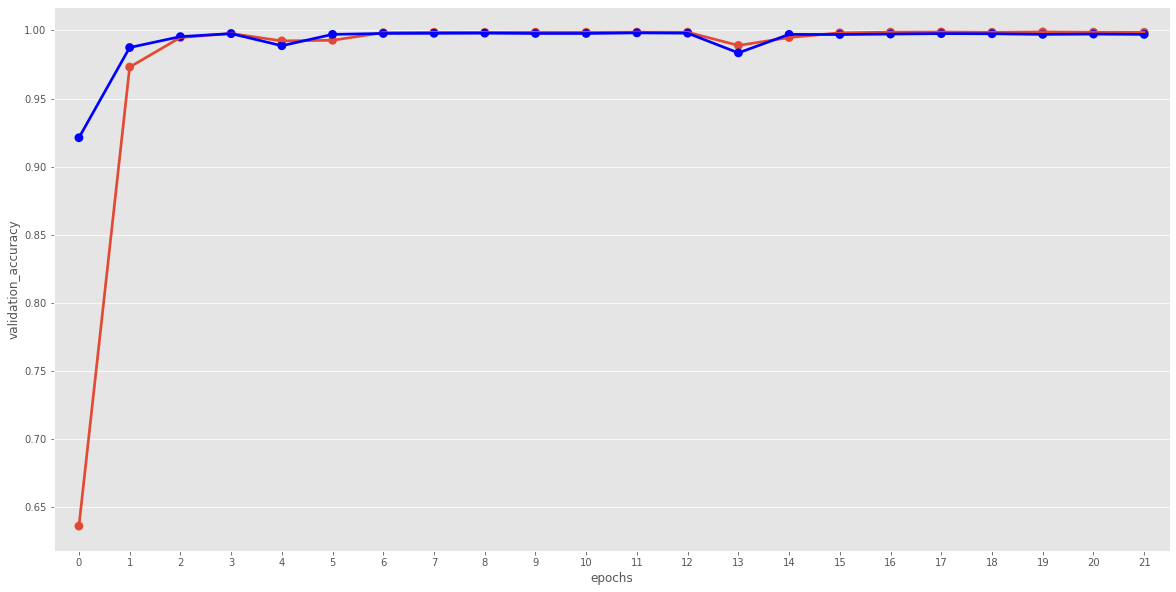

In [11]:
data['target'] = data.label.astype('category').cat.codes
#data['num_words'] = data.status_text.apply(lambda x : len(x.split()))

num_class = len(np.unique(data.label.values))
y = data['target'].values

MAX_LENGTH = 20
tokenizer = Tokenizer()
print("tokening......")
try:
    tokenizer.fit_on_texts(data.status_text.values)
    post_seq = tokenizer.texts_to_sequences(data.status_text.values)

    post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

    X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.20)

    vocab_size = len(tokenizer.word_index) + 1

    print(vocab_size)


    inputs = Input(shape=(MAX_LENGTH, ))

    # embedding vec feature 256
    embedding_layer = Embedding(vocab_size,
                                256,
                                input_length=MAX_LENGTH)(inputs)

    x = LSTM(128)(embedding_layer)
    #x = Dense(128)(embedding_layer)
    #x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(num_class, activation='softmax')(x)
    model = Model(inputs=[inputs], outputs=predictions)
    #sgd = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

    model.summary()

    filepath="weights.hdf5"
    checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    earlyStopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='max')
    history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_data=(X_test,to_categorical(y_test)),
                        shuffle=True, epochs=400, callbacks=[checkpointer,earlyStopping])

    df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
    g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
    g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='blue')

    model.load_weights('weights.hdf5')
    predicted = model.predict(X_test)
    print("predicted  = ")
    #print(predicted)
    #matrix = metrics.confusion_matrix(X_test.argmax(axis=1), predicted.argmax(axis=1))
    #print(matrix);
    predicted = np.argmax(predicted, axis=1)

    print(confusion_matrix(y_test, predicted))

    print(accuracy_score(y_test, predicted))
except:
    print(".....XXX....")
    pass

41143
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 20, 256)           10532608  
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 25)                1625      
                                                                 
Total params: 10,739,609
Trainable params: 10,739,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
571/571 [=====================

0.998245998684499


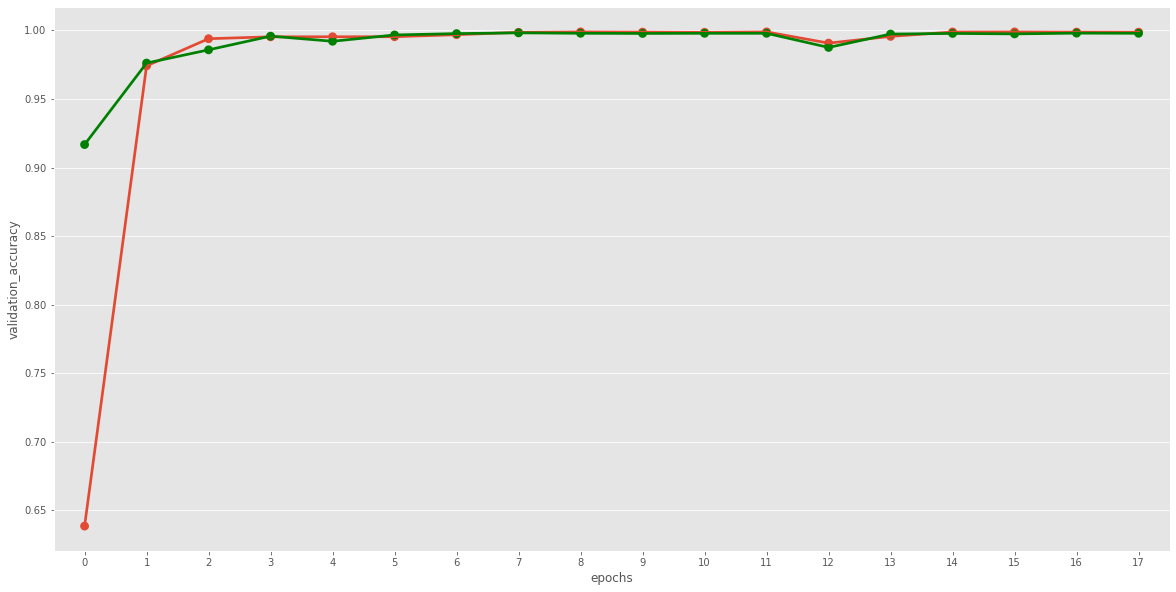

In [12]:
data['target'] = data.label.astype('category').cat.codes
#data['num_words'] = data.status_text.apply(lambda x : len(x.split()))

num_class = len(np.unique(data.label.values))
y = data['target'].values

MAX_LENGTH = 20
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.status_text.values)
post_seq = tokenizer.texts_to_sequences(data.status_text.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.20)

vocab_size = len(tokenizer.word_index) + 1

print(vocab_size)


inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            256,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(128)(embedding_layer)
x = Dense(64, activation='relu')(x)
#x = Dense(128, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_data=(X_test,to_categorical(y_test)),
                    shuffle=True, epochs=50, callbacks=[checkpointer,earlyStopping])

df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

model.load_weights('weights.hdf5')
predicted = model.predict(X_test)
print("predicted  = ")
#print(predicted)
#matrix = metrics.confusion_matrix(X_test.argmax(axis=1), predicted.argmax(axis=1))
#print(matrix);
predicted = np.argmax(predicted, axis=1)

print(confusion_matrix(y_test, predicted))

print(accuracy_score(y_test, predicted))